In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
train=pd.read_csv('D:\\Data Science\\Projects\\Titanic\\train.csv')
test=pd.read_csv('D:\\Data Science\\Projects\\Titanic\\test.csv')

In [3]:
data_train=train.copy()
data_test=test.copy()

In [4]:
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


Data Wrangling

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
to_drop=['Cabin','Name','PassengerId','Ticket']
train.drop(to_drop,axis=1,inplace=True)
test.drop(to_drop,axis=1,inplace=True)

In [7]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [8]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [9]:
train.describe(include='all')

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN


In [10]:
test.describe()

,Pclass,Age,SibSp,Parch,Fare
count,418.000000,332.000000,418.000000,418.000000,417.000000
mean,2.265550,30.272590,0.447368,0.392344,35.627188
std,0.841838,14.181209,0.896760,0.981429,55.907576
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,1.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,27.000000,0.000000,0.000000,14.454200
75%,3.000000,39.000000,1.000000,0.000000,31.500000
max,3.000000,76.000000,8.000000,9.000000,512.329200


In [11]:
train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [12]:
test.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [13]:
train['Embarked']=train['Embarked'].fillna('S')
train['Age']=train['Age'].fillna(train['Age'].median())
train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [14]:
test['Age']=test['Age'].fillna(test['Age'].median())
test['Fare']=test['Fare'].fillna(35.627)
test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [15]:
gender=pd.get_dummies(train['Sex'])
embark=pd.get_dummies(train['Embarked'])
cls=pd.get_dummies(train['Pclass'])
train=pd.concat([train,gender,embark,cls],axis=1)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,female,male,C,Q,S,1,2,3
0,0,3,male,22.0,1,0,7.2500,S,0,1,0,0,1,0,0,1
1,1,1,female,38.0,1,0,71.2833,C,1,0,1,0,0,1,0,0
2,1,3,female,26.0,0,0,7.9250,S,1,0,0,0,1,0,0,1
3,1,1,female,35.0,1,0,53.1000,S,1,0,0,0,1,1,0,0
4,0,3,male,35.0,0,0,8.0500,S,0,1,0,0,1,0,0,1


In [16]:
train=train.drop(['Pclass','Sex','Embarked'],axis=1)

In [17]:
train.head()

,Survived,Age,SibSp,Parch,Fare,female,male,C,Q,S,1,2,3
0,0,22.0,1,0,7.2500,0,1,0,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0,1,0,0
2,1,26.0,0,0,7.9250,1,0,0,0,1,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1,1,0,0
4,0,35.0,0,0,8.0500,0,1,0,0,1,0,0,1


In [18]:
gender=pd.get_dummies(test['Sex'])
embark=pd.get_dummies(test['Embarked'])
cls=pd.get_dummies(test['Pclass'])
test=pd.concat([test,gender,embark,cls],axis=1)
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,female,male,C,Q,S,1,2,3
0,3,male,34.5,0,0,7.8292,Q,0,1,0,1,0,0,0,1
1,3,female,47.0,1,0,7.0000,S,1,0,0,0,1,0,0,1
2,2,male,62.0,0,0,9.6875,Q,0,1,0,1,0,0,1,0
3,3,male,27.0,0,0,8.6625,S,0,1,0,0,1,0,0,1
4,3,female,22.0,1,1,12.2875,S,1,0,0,0,1,0,0,1


In [19]:
test=test.drop(['Pclass','Sex','Embarked'],axis=1)

In [20]:
test.head()

,Age,SibSp,Parch,Fare,female,male,C,Q,S,1,2,3
0,34.5,0,0,7.8292,0,1,0,1,0,0,0,1
1,47.0,1,0,7.0000,1,0,0,0,1,0,0,1
2,62.0,0,0,9.6875,0,1,0,1,0,0,1,0
3,27.0,0,0,8.6625,0,1,0,0,1,0,0,1
4,22.0,1,1,12.2875,1,0,0,0,1,0,0,1


Data Analysis

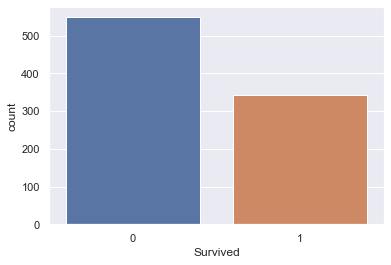

In [21]:
sns.countplot(x='Survived',data=train)

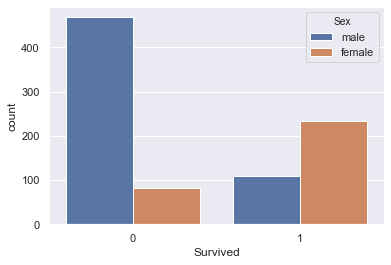

In [22]:
sns.countplot(x='Survived',hue='Sex',data=data_train)

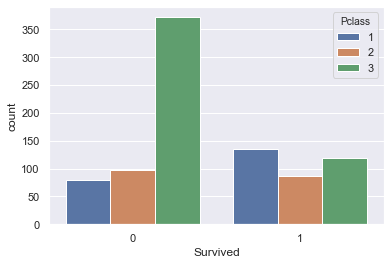

In [23]:
sns.countplot(x='Survived',hue='Pclass',data=data_train)

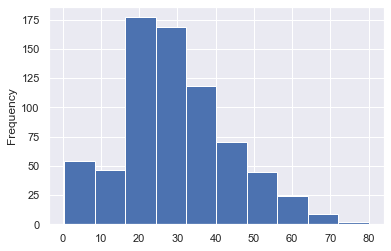

In [24]:
data_train['Age'].plot.hist()

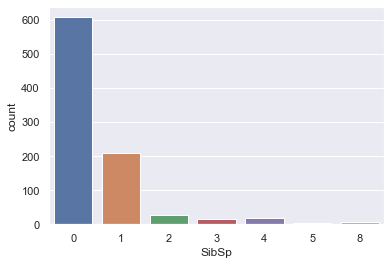

In [25]:
sns.countplot(x='SibSp',data=data_train)

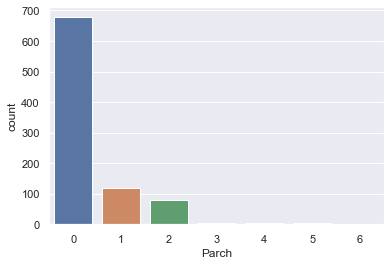

In [26]:
sns.countplot(x='Parch',data=data_train)

Build Model

In [27]:
target=train['Survived']
inputs=train.drop(['Survived'],axis=1)

In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(inputs, target, test_size=0.20, random_state=7)

Function for using Cross Validation in each model

In [29]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer, r2_score

def test_model(model, X_train=x_train, y_train=y_train):
    cv = KFold(n_splits = 3, shuffle=True, random_state = 45)
    #r2 = make_scorer(r2_score)
    r2_val_score = cross_val_score(model, X_train, y_train, cv=cv)
    score = [r2_val_score.mean()]
    return score

Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier,ExtraTreesClassifier
Rfc = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
Rfc.fit(x_train,y_train)
y_pred=Rfc.predict(x_test)

In [31]:
'''
from sklearn.metrics import classification_report,accuracy_score
print(classification_report(y_test,y_pred))
print('Accuracy : ',accuracy_score(y_test,y_pred))
'''

"\nfrom sklearn.metrics import classification_report,accuracy_score\nprint(classification_report(y_test,y_pred))\nprint('Accuracy : ',accuracy_score(y_test,y_pred))\n"

In [32]:
#Using Cross Validation
test_model(Rfc)

[0.8132172700303749]

Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression
lgt= LogisticRegression()
lgt.fit(x_train,y_train)
y_pred1=lgt.predict(x_test)

In [34]:
'''
from sklearn.metrics import classification_report,accuracy_score
print(classification_report(y_test,y_pred1))
print('Accuracy :',accuracy_score(y_test,y_pred1))
'''

"\nfrom sklearn.metrics import classification_report,accuracy_score\nprint(classification_report(y_test,y_pred1))\nprint('Accuracy :',accuracy_score(y_test,y_pred1))\n"

In [35]:
test_model(lgt)

[0.8034310770721791]

SVM Cross Validation Accuracy

In [36]:
from sklearn.svm import SVC
svm=SVC()
test_model(svm)

[0.7078856859199375]

Ada Boost Classifier

In [37]:
adc=AdaBoostClassifier()
test_model(adc)

[0.8034015293881266]

Gradient Boosting Classifier

In [38]:
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
test_model(gb)

[0.8160420286257963]

Extra Trees Classifier

In [39]:
etc=ExtraTreesClassifier()
test_model(etc)

[0.8062262879835478]

Bagging Classifier

In [40]:
bc=BaggingClassifier()
test_model(bc)

[0.8132231795671855]

K Nearst Neighbour

In [41]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, metric = 'minkowski', p = 2)
test_model(knn)

[0.7008651561890579]

Hyperparameter tuning for GradientBoosting

In [42]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
params = {'n_estimators':[50,70,100,120]
         }
rand_search = RandomizedSearchCV(gb, param_distributions=params, n_jobs=-1, cv=11)
rand_search.fit(x_train, y_train)
rand_search.best_score_

0.8384831460674157

In [43]:
rand_search.best_estimator_

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=70,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [44]:
bn=GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=70,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
bn.fit(x_train,y_train)
pred=bn.predict(x_test)
from sklearn.metrics import classification_report,accuracy_score
print(classification_report(y_test,pred))
print('Accuracy :',accuracy_score(y_test,pred))


              precision    recall  f1-score   support

           0       0.79      0.89      0.84       110
           1       0.78      0.62      0.69        69

    accuracy                           0.79       179
   macro avg       0.79      0.76      0.77       179
weighted avg       0.79      0.79      0.78       179

Accuracy : 0.7877094972067039


In [45]:
prediction=bn.predict(test)
prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [47]:
Survived=pd.DataFrame(prediction)
df=pd.read_csv('D:\\Data Science\\Projects\\Titanic\\Submission.csv')
dataset=pd.concat([df['PassengerId'],Survived],axis=1)
dataset.columnc=['PassengerId','Survived']
dataset.to_csv('D:\\Data Science\\Projects\\Titanic\\Submission.csv',index=False)